# 8.2 进行数据预处理

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [6]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [7]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')  # x_Train.shape[0] = 60000, length = 28, width = 28
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [8]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [9]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 8.3 建立模型

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [11]:
# Build a Sequential model
model = Sequential()

In [12]:
# Build first layer
model.add(Conv2D(filters=16,  # build 16 filters
                 kernel_size=(5,5),   # Size for each filter is 5x5
                 padding='same',   # This setting lets the size of image remain the same
                 input_shape=(28,28,1),   # len = 28, wid = 28, color = 1
                 activation='relu'))

In [13]:
# Add pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
# Build second layer
model.add(Conv2D(filters=36,  # build 36 filters
                 kernel_size=(5,5),   # Size for each filter is 5x5
                 padding='same',   # This setting lets the size of image remain the same
                 input_shape=(28,28,1),   # len = 28, wid = 28, color = 1
                 activation='relu'))

In [15]:
# Add pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
# Add Dropout layer. This drops 25% of nerves to prevent overfitting
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(128, activation='relu'))

In [19]:
model.add(Dropout(0.5))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 8.4 进行训练

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
train_history = model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 37s - loss: 0.4895 - acc: 0.8471 - val_loss: 0.0969 - val_acc: 0.9723
Epoch 2/10
 - 36s - loss: 0.1412 - acc: 0.9587 - val_loss: 0.0639 - val_acc: 0.9808
Epoch 3/10
 - 36s - loss: 0.1030 - acc: 0.9691 - val_loss: 0.0526 - val_acc: 0.9838
Epoch 4/10
 - 36s - loss: 0.0841 - acc: 0.9753 - val_loss: 0.0461 - val_acc: 0.9858
Epoch 5/10
 - 36s - loss: 0.0716 - acc: 0.9780 - val_loss: 0.0401 - val_acc: 0.9873
Epoch 6/10
 - 36s - loss: 0.0648 - acc: 0.9804 - val_loss: 0.0393 - val_acc: 0.9887
Epoch 7/10
 - 35s - loss: 0.0563 - acc: 0.9827 - val_loss: 0.0408 - val_acc: 0.9878
Epoch 8/10
 - 36s - loss: 0.0506 - acc: 0.9848 - val_loss: 0.0351 - val_acc: 0.9900
Epoch 9/10
 - 36s - loss: 0.0455 - acc: 0.9864 - val_loss: 0.0328 - val_acc: 0.9904
Epoch 10/10
 - 35s - loss: 0.0421 - acc: 0.9869 - val_loss: 0.0338 - val_acc: 0.9903


In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show

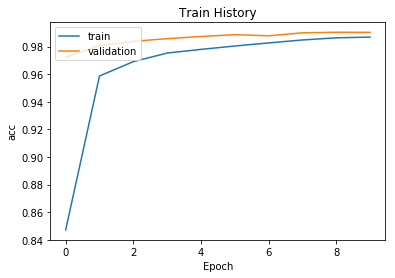

In [30]:
show_train_history(train_history, 'acc', 'val_acc')

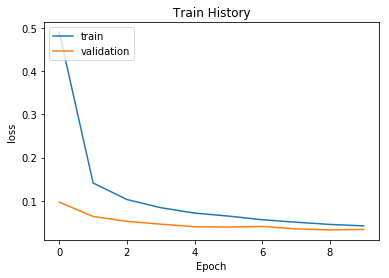

In [31]:
show_train_history(train_history, 'loss', 'val_loss')

# 8.5 评估模型准确率

In [33]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 3s 346us/step


0.99139999999999995

# 8.6 进行预测

In [34]:
prediction = model.predict_classes(x_Test4D_normalize)

In [35]:
prediction[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [36]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title='label=' + str(labels[idx])
        if len(prediction) > 0:
            title += ', predict = ' + str(prediction[idx])
            
        ax.set_title(title, fontsize = 12, color = 'white')
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

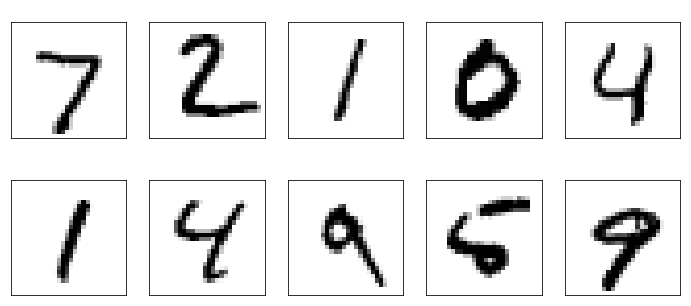

In [37]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx = 0)

# 8.7 显示混淆矩阵

In [38]:
import pandas as pd
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1130,1,0,0,1,1,1,1,0
2,2,1,1027,0,0,0,0,2,0,0
3,0,0,0,1006,0,2,0,2,0,0
4,0,0,0,0,974,0,1,0,1,6
5,1,1,0,5,0,882,2,0,0,1
6,4,2,0,1,1,1,949,0,0,0
7,0,2,4,2,0,0,0,1017,1,2
8,4,0,3,2,1,2,0,2,957,3
